In [ ]:
pip install -r requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.9/738.9 kB 47.5 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110701 sha256=b960d1372471765a4308214c3dc9e3e61aa47e3da8cf40943ea4e409e1d094a3
  Stored in directory: /root/.cache/pip/wheels/d2/ed/a5/da3a0cfb13373d1ace41cafa4f2467d858c55c52473ba72799
Successfully built kaggle

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!kaggle datasets download -d die9origephit/fifa-world-cup-2022-complete-dataset --unzip

  0%|                                               | 0.00/7.42k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 7.42k/7.42k [00:00<00:00, 2.80MB/s]


In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import bokeh
from bokeh.plotting import figure, gridplot, show
from bokeh.io import output_notebook
from bokeh.models import LabelSet, ColumnDataSource,FactorRange,HoverTool, Legend
from bokeh.transform import factor_cmap,dodge
from bokeh.palettes import Spectral11,HighContrast3

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
from bokeh.plotting import figure, output_file, save
from IPython.display import IFrame
from IPython.core.display import display, HTML
import tempfile


def bokeh_deepnote_show(plot):
    tmp_output_filename = tempfile.NamedTemporaryFile(suffix='.html').name
    output_file(tmp_output_filename)
    save(plot)

    f = open(tmp_output_filename, "r")
    display(HTML(f.read()))

/tmp/ipykernel_35/2106465036.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [ ]:
qatar_origin_df = pd.read_csv('/work/Fifa_world_cup_matches.csv')

qatar_origin_df.head(10)

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,total attempts team1,total attempts team2,conceded team1,conceded team2,goal inside the penalty area team1,goal inside the penalty area team2,goal outside the penalty area team1,goal outside the penalty area team2,assists team1,assists team2,on target attempts team1,on target attempts team2,off target attempts team1,off target attempts team2,attempts inside the penalty area team1,attempts inside the penalty area team2,attempts outside the penalty area team1,attempts outside the penalty area team2,left channel team1,left channel team2,left inside channel team1,left inside channel team2,central channel team1,central channel team2,right inside channel team1,right inside channel team2,right channel team1,right channel team2,total offers to receive team1,total offers to receive team2,inbehind offers to receive team1,inbehind offers to receive team2,inbetween offers to receive team1,inbetween offers to receive team2,infront offers to receive team1,infront offers to receive team2,receptions between midfield and defensive lines team1,receptions between midfield and defensive lines team2,attempted line breaks team1,attempted line breaks team2,completed line breaksteam1,completed line breaks team2,attempted defensive line breaks team1,attempted defensive line breaks team2,completed defensive line breaksteam1,completed defensive line breaks team2,yellow cards team1,yellow cards team2,red cards team1,red cards team2,fouls against team1,fouls against team2,offsides team1,offsides team2,passes team1,passes team2,passes completed team1,passes completed team2,crosses team1,crosses team2,crosses completed team1,crosses completed team2,switches of play completed team1,switches of play completed team2,corners team1,corners team2,free kicks team1,free kicks team2,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,5,6,2,0,0,2,0,0,0,1,0,3,5,3,2,4,3,2,15,8,0,7,3,6,1,4,9,6,520,532,116,127,235,187,169,218,5,8,136,155,86,99,9,13,4,7,4,2,0,0,15,15,3,4,450,480,381,409,9,14,4,4,9,9,1,3,19,17,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,13,8,2,6,6,2,0,0,6,1,7,3,3,4,10,6,3,2,11,3,5,0,2,3,3,1,11,0,1061,212,207,53,386,86,468,73,16,4,238,101,178,45,25,7,16,4,0,2,0,0,9,14,2,2,809,224,730,154,23,8,7,1,12,3,8,0,16,10,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,14,9,2,0,0,2,0,0,0,1,3,3,8,5,7,5,7,4,12,11,4,2,2,2,4,7,13,20,502,506,123,117,230,191,149,198,15,14,151,162,89,96,22,22,15,10,2,1,0,0,13,13,2,1,383,438,313,374,19,25,7,8,9,6,6,7,14,14,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,6,7,1,1,1,1,0,0,1,0,1,3,4,3,4,5,2,2,14,7,5,2,4,5,4,2,11,7,725,436,149,100,336,172,240,164,12,9,199,174,146,103,23,17,15,8,4,2,0,0,15,10,1,1,569,409,509,321,31,15,4,6,5,8,5,3,11,15,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,14,3,2,1,1,2,0,0,0,1,6,2,5,0,10,3,4,0,12,3,4,2,5,3,8,3,18,8,650,268,157,69,177,131,316,68,26,9,191,137,127,68,39,15,25,7,0,6,0,0,7,21,10,1,610,267,529,190,29,9,12,2,5,7,9,2,22,16,1,0,4,14,0,0,65,80,163,361
5,DENMARK,TUNISIA,55%,33%,12%,0,0,22 NOV 2022,14 : 00,Group D,11,11,0,0,0,0,0,0,0,0,4,1,4,7,7,6,4,5,17,9,4,2,7,2,6,3,18,6,681,477,152,89,276,204,253,184,14,7,190,174,136,85,21,17,12,6,2,1,0,0,9,10,1,1,594,387,523,302,27,13,10,3,11,1,11,9,11,10,0,0,11,11,0,0,76,73,226,287
6,MEXICO,POLAND,54%,31%,15%,0,0,22 NOV 2022,17 : 00,Group C,13,8,0,0,0,0,0,0,0,0,4,1,5,4,10,7,3,1,20,8,6,6,1,6,3,4,27,13,547,296,128,72,202,101,217,123,20,3,170,150,117,82,32,12,19,2,2,1,0,0,14,16,3,0,485,322,422,241,33,10,8,2,9,1,6,5,16,16,

In [ ]:
print(qatar_origin_df.shape)
print(qatar_origin_df.info())

(64, 88)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 88 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   team1                                                  64 non-null     object
 1   team2                                                  64 non-null     object
 2   possession team1                                       64 non-null     object
 3   possession team2                                       64 non-null     object
 4   possession in contest                                  64 non-null     object
 5   number of goals team1                                  64 non-null     int64 
 6   number of goals team2                                  64 non-null     int64 
 7   date                                                   64 non-null     object
 8   hour                                                 

In [ ]:
qatar_origin_df['possession team1'] = qatar_origin_df['possession team1'].str.rstrip('%').astype('float') / 100.0
qatar_origin_df['possession team2'] = qatar_origin_df['possession team2'].str.rstrip('%').astype('float') / 100.0
qatar_origin_df['category'] = qatar_origin_df['category'].str.replace('Group.*', 'Group', regex=True)



In [ ]:
columnas= qatar_origin_df.columns

In [ ]:
filter1 = []
filter2 = []

for columna in columnas:

    if 'team1' in columna:
        filter1.append(columna)

    elif 'team2' in columna:
        filter2.append(columna)
    else:
        
        pass

In [ ]:
team1_df = qatar_origin_df.drop(columns= filter2)
team2_df = qatar_origin_df.drop(columns= filter1)

names = [elemento.replace(' team1', '') for elemento in team1_df.columns]
names = [elemento.replace('1', '') for elemento in names]

print(names)
team1_df.columns= names
team2_df.columns= names
print(team1_df.shape, team2_df.shape, team1_df.columns, team2_df.columns)


['team', 'possession', 'possession in contest', 'number of goals', 'date', 'hour', 'category', 'total attempts', 'conceded', 'goal inside the penalty area', 'goal outside the penalty area', 'assists', 'on target attempts', 'off target attempts', 'attempts inside the penalty area', 'attempts outside the penalty area ', 'left channel', 'left inside channel', 'central channel', 'right inside channel', 'right channel', 'total offers to receive', 'inbehind offers to receive', 'inbetween offers to receive', 'infront offers to receive', 'receptions between midfield and defensive lines', 'attempted line breaks', 'completed line breaksteam', 'attempted defensive line breaks', 'completed defensive line breaksteam', 'yellow cards', 'red cards', 'fouls against', 'offsides', 'passes', 'passes completed', 'crosses', 'crosses completed', 'switches of play completed', 'corners', 'free kicks', 'penalties scored', 'goal preventions', 'own goals', 'forced turnovers', 'defensive pressures applied']
(64, 4

In [ ]:
qatar_teams= pd.concat([team1_df,team2_df], axis= 0)



In [ ]:
qatar_teams_goals = qatar_teams.groupby('team').agg({'number of goals': ['sum', lambda x: round(x.mean(), 1)], 
                                                        'goal inside the penalty area': 'sum',
                                                        'total attempts': 'sum',
                                                        'on target attempts': 'sum',
                                                        'off target attempts': 'sum',
                                                        'attempts inside the penalty area': 'sum',
                                                        'penalties scored' : 'sum'})
#qatar_teams_grouped['% goal inside the penalty area'] = (qatar_teams_grouped['goal inside the penalty area']/ qatar_teams_grouped['number of goals']['sum'] ) * 100

qatar_teams_goals = qatar_teams_goals.reset_index()
qatar_teams_goals.columns
qatar_teams_goals['%goals inside']= round(((qatar_teams_goals['goal inside the penalty area']['sum'] - qatar_teams_goals['penalties scored']['sum'])/ qatar_teams_goals['number of goals']['sum'])*100,2)
qatar_teams_goals['%goals of penalties']= round((qatar_teams_goals['penalties scored']['sum'] / qatar_teams_goals['number of goals']['sum'])*100,2)
qatar_teams_goals['%goals outside']= 100-qatar_teams_goals['%goals inside']-qatar_teams_goals['%goals of penalties']
qatar_teams_goals['Situacion per goal'] = round((qatar_teams_goals['total attempts']['sum'] / qatar_teams_goals['number of goals']['sum']),2)
qatar_teams_goals['% attempts inside area'] = round((qatar_teams_goals['attempts inside the penalty area']['sum'] / qatar_teams_goals['total attempts']['sum'])*100,2)
qatar_teams_goals['% attempts outside area'] = 100-qatar_teams_goals['% attempts inside area']
team_counts = qatar_teams['team'].value_counts().reset_index()


qatar_teams_goals.columns = ['team','number of goals','number of goals avg','goal inside the penalty area',
                                'total attempts','on target attempts','off target attempts','attempts inside the penalty area',
                                'penalties scored','%goals inside','%goals of penalties','%goals outside','Situacion per goal',
                                '% attempts inside area','% attempts outside area']

qatar_teams_goals

,team,number of goals,number of goals avg,goal inside the penalty area,total attempts,on target attempts,off target attempts,attempts inside the penalty area,penalties scored,%goals inside,%goals of penalties,%goals outside,Situacion per goal,% attempts inside area,% attempts outside area
0,ARGENTINA,15,2.1,14,104,48,42,66,4,66.67,26.67,6.66,6.93,63.46,36.54
1,AUSTRALIA,4,1.0,3,25,9,10,13,0,75.00,0.00,25.00,6.25,52.00,48.00
2,BELGIUM,1,0.3,1,34,11,19,23,0,100.00,0.00,0.00,34.00,67.65,32.35
3,BRAZIL,8,1.6,8,90,41,34,57,1,87.50,12.50,0.00,11.25,63.33,36.67
4,CAMEROON,4,1.3,4,27,14,8,20,0,100.00,0.00,0.00,6.75,74.07,25.93
5,CANADA,2,0.7,1,35,6,19,22,0,50.00,0.00,50.00,17.50,62.86,37.14
6,COSTA RICA,3,1.0,3,12,7,2,7,0,100.00,0.00,0.00,4.00,58.33,41.67
7,CROATIA,8,1.1,7,81,28,36,47,0,87.50,0.00,12.50,10.12,58.02,41.98
8,DENMARK,1,0.3,1,35,9,17,23,0,100.00,0.00,0.00,35.00,65.71,34.29
9,ECUADOR,4,1.3,4,27,12,9,17,1,75.00,25.00,0.00,6.75,62.96,37.04


In [ ]:
qatar_teams_goals_sort = qatar_teams_goals.sort_values(('number of goals'), ascending=False)
team_counts = qatar_teams['team'].value_counts().reset_index()
team_counts.columns = ['team', 'team_appearances']
qatar_teams_goals_sorted = pd.merge(qatar_teams_goals_sort, team_counts, on='team')



plot1 = figure(x_range=qatar_teams_goals_sorted['team'], height=350, title="Total of goals on the WC",
           toolbar_location=None, tools="")

plot1.vbar(x=qatar_teams_goals_sorted['team'], top=qatar_teams_goals_sorted['number of goals'], width=0.9)


plot1.xgrid.grid_line_color = None
plot1.y_range.start = 0
plot1.xaxis.major_label_orientation = 1


plot2 = figure(x_range=qatar_teams_goals_sorted['team'], height=350, title="Total of goals avg on the WC",
           toolbar_location=None, tools="")

plot2.vbar(x=qatar_teams_goals_sorted['team'], top=qatar_teams_goals_sorted['number of goals avg'], width=0.9)

plot2.xgrid.grid_line_color = None
plot2.y_range.start = 0
plot2.xaxis.major_label_orientation = 1


plot3 = figure(x_range=qatar_teams_goals_sorted['team'], height=350, title="Situacion per goal",
           toolbar_location=None, tools="")

plot3.vbar(x=qatar_teams_goals_sorted['team'], top=qatar_teams_goals_sorted['Situacion per goal'], width=0.9)

plot3.xgrid.grid_line_color = None
plot3.y_range.start = 0
plot3.xaxis.major_label_orientation = 1

plot4 = figure(x_range=qatar_teams_goals_sorted['team'], height=350, title="Total of goals on the WC",
               toolbar_location=None, tools="hover")

plot4.vbar(x=qatar_teams_goals_sorted['team'], top=qatar_teams_goals_sorted['%goals inside'], width=0.4,
           color=HighContrast3[0], legend_label="%goals inside")

plot4.vbar(x=qatar_teams_goals_sorted['team'], top=qatar_teams_goals_sorted['%goals outside'], width=0.4,
           color=HighContrast3[1], legend_label="%goals outside")

plot4.vbar(x=qatar_teams_goals_sorted['team'], top=qatar_teams_goals_sorted['%goals of penalties'], width=0.4,
           color=HighContrast3[2], legend_label="%goals of penalties")

plot4.xaxis.major_label_orientation = 1
plot4.y_range.start = 0
plot4.x_range.range_padding = 0.1
plot4.xgrid.grid_line_color = None
plot4.axis.minor_tick_line_color = None
plot4.outline_line_color = None
plot4.legend.location = "top_left"
plot4.legend.orientation = "vertical"


grid = gridplot([[plot1, plot2],[plot3, plot4]])

bokeh_deepnote_show(grid)

In [ ]:
qatar_teams_attack= qatar_teams.groupby('team').agg({'left channel': 'sum',
                                                'left inside channel': 'sum',
                                                'central channel': 'sum',
                                                'right inside channel': 'sum',
                                                'right channel': 'sum'})

qatar_teams_attack['total'] = qatar_teams_attack.sum(axis=1)

for columna in qatar_teams_attack.columns:
    qatar_teams_attack[columna] = round((qatar_teams_attack[columna]/ qatar_teams_attack['total'])*100,2) 
qatar_teams_attack

,left channel,left inside channel,central channel,right inside channel,right channel,total
team,,,,,,
ARGENTINA,27.11,13.86,15.96,12.65,30.42,100.0
AUSTRALIA,31.71,6.50,10.57,12.20,39.02,100.0
BELGIUM,35.64,15.84,14.85,9.90,23.76,100.0
BRAZIL,33.45,13.99,13.99,11.60,26.96,100.0
CAMEROON,19.64,20.54,10.71,11.61,37.50,100.0
CANADA,35.34,10.53,9.77,11.28,33.08,100.0
COSTA RICA,50.00,12.50,17.50,5.00,15.00,100.0
CROATIA,38.11,12.38,10.75,8.79,29.97,100.0
DENMARK,34.97,8.59,8.59,9.82,38.04,100.0


In [ ]:
qatar_teams_passes = qatar_teams.groupby('team').agg({'total offers to receive': 'sum',
                                                     'inbehind offers to receive': 'sum', 
                                                     'inbetween offers to receive': 'sum',
                                                     'infront offers to receive': 'sum',
                                                     'receptions between midfield and defensive lines': 'mean',
                                                     'attempted line breaks': ['mean','sum'], 
                                                     'completed line breaksteam': 'sum',
                                                     'attempted defensive line breaks': ['mean','sum'],
                                                     'completed defensive line breaksteam': 'sum', 
                                                     'passes': ['mean','sum'] ,
                                                     'passes completed': 'sum',
                                                     'switches of play completed': 'mean', 
                                                     'corners': 'mean',
                                                     'free kicks': 'mean'})

for columna in ['inbehind offers to receive','inbetween offers to receive','infront offers to receive']:
    qatar_teams_passes[columna] = round((qatar_teams_passes[columna]/ qatar_teams_passes['total offers to receive'])*100,2) 
qatar_teams_passes['passes completed'] = qatar_teams_passes['passes completed']['sum']/  qatar_teams_passes['passes']['sum'] *100
qatar_teams_passes['completed line breaksteam'] = qatar_teams_passes['completed line breaksteam']['sum']/  qatar_teams_passes['attempted line breaks']['sum'] *100
qatar_teams_passes['completed defensive line breaksteam'] = qatar_teams_passes['completed defensive line breaksteam']['sum']/  qatar_teams_passes['attempted defensive line breaks']['sum'] *100

qatar_teams_passes = qatar_teams_passes.round(2)


qatar_teams_passes

total offers to receive inbehind offers to receive  \
                                   sum                        sum   
team                                                                
ARGENTINA                         4595                      19.54   
AUSTRALIA                         1703                      23.25   
BELGIUM                           1931                      19.78   
BRAZIL                            3432                      21.71   
CAMEROON                          1377                      21.79   
CANADA                            1877                      23.97   
COSTA RICA                        1023                      22.39   
CROATIA                           4402                      20.90   
DENMARK                           1936                      24.23   
ECUADOR                           1526                      19.40   
ENGLAND                           3969                      18.39   
FRANCE                            3757                      19.86   
GERMANY                           2052                      25.54   
GHANA                             1445                      21.66   
IRAN                              1047                      24.45   
JAPAN                             2052                      24.95   
KOREA REPUBLIC                    2263                      22.98   
MEXICO                            1412                      28.33   
MOROCCO                           3520                      20.65   
NETHERLANDS                       3049                      19.45   
POLAND                            1553                      25.63   
PORTUGAL                          3648                      22.15   
QATAR                             1605                      20.25   
SAUDI ARABIA                      1266                      25.67   
SENEGAL                           1812                      23.73   
SERBIA                            1574                      17.98   
SPAIN                             3752                      16.68   
SWITZERLAND                       2250                      22.40   
TUNISIA                           1568                      22.58   
UNITED STATES                     2781                      21.22   
URUGUAY                           1403                      27.73   
WALES                             1546                      19.79   

               inbetween offers to receive infront offers to receive  \
                                       sum                       sum   
team                                                                   
ARGENTINA                            36.93                     43.53   
AUSTRALIA                            36.76                     39.99   
BELGIUM                              34.18                     46.04   
BRAZIL                               38.37                     39.92   
CAMEROON                             39.29                     38.93   
CANADA                               39.26                     36.76   
COSTA RICA                           42.72                     34.90   
CROATIA                              40.37                     38.73   
DENMARK                              41.48                     34.30   
ECUADOR                              41.74                     38.86   
ENGLAND                              39.66                     41.95   
FRANCE                               33.78                     46.37   
GERMANY                              39.72                     34.75   
GHANA                                40.90                     37.44   
IRAN                                 43.74                     31.81   
JAPAN                                37.87                     37.18   
KOREA REPUBLIC                       40.57                     36.46   
MEXICO                               36.19                     35.48   
MOROCCO                              40.77                     38.58   
NETHERLANDS    

In [ ]:
qatar_teams_general =qatar_teams.groupby('team').agg({'possession': 'mean',
                                                        'assists':'mean', 
                                                        'fouls against': 'mean',
                                                        'offsides': 'mean',
                                                        'crosses': 'mean',
                                                        'crosses completed': 'mean', 
                                                        'corners': 'mean',
                                                        'free kicks': 'mean',
                                                        'own goals': 'mean',
                                                        'forced turnovers': 'mean',
                                                        'defensive pressures applied': 'mean',
                                                        'number of goals': 'sum'}).reset_index()

qatar_teams_general = qatar_teams_general.round(2)
qatar_teams_general

,team,possession,assists,fouls against,offsides,crosses,crosses completed,corners,free kicks,own goals,forced turnovers,defensive pressures applied,number of goals
0,ARGENTINA,0.51,1.14,14.29,3.29,16.43,4.29,5.57,17.57,0.14,70.57,241.14,15
1,AUSTRALIA,0.31,0.75,13.00,0.25,14.50,2.50,2.00,12.00,0.00,76.75,345.75,4
2,BELGIUM,0.50,0.33,10.00,1.00,17.00,5.33,5.67,14.33,0.00,60.00,274.67,1
3,BRAZIL,0.50,1.20,12.60,1.60,23.20,4.80,7.40,17.00,0.00,72.20,295.40,8
4,CAMEROON,0.38,1.33,10.67,0.67,17.33,2.67,4.00,15.33,0.00,80.00,307.33,4
5,CANADA,0.47,0.33,11.00,2.67,18.00,5.00,4.00,14.00,0.00,61.67,286.67,2
6,COSTA RICA,0.28,0.33,8.00,4.33,7.33,1.00,0.33,15.00,0.00,73.67,419.00,3
7,CROATIA,0.48,1.14,12.86,1.57,23.29,5.14,4.29,15.14,0.00,78.29,301.86,8
8,DENMARK,0.53,0.33,9.33,1.67,25.67,6.33,7.00,9.33,0.00,70.33,223.00,1
9,ECUADOR,0.47,0.67,16.67,2.67,18.33,4.67,3.67,15.67,0.00,61.00,249.33,4


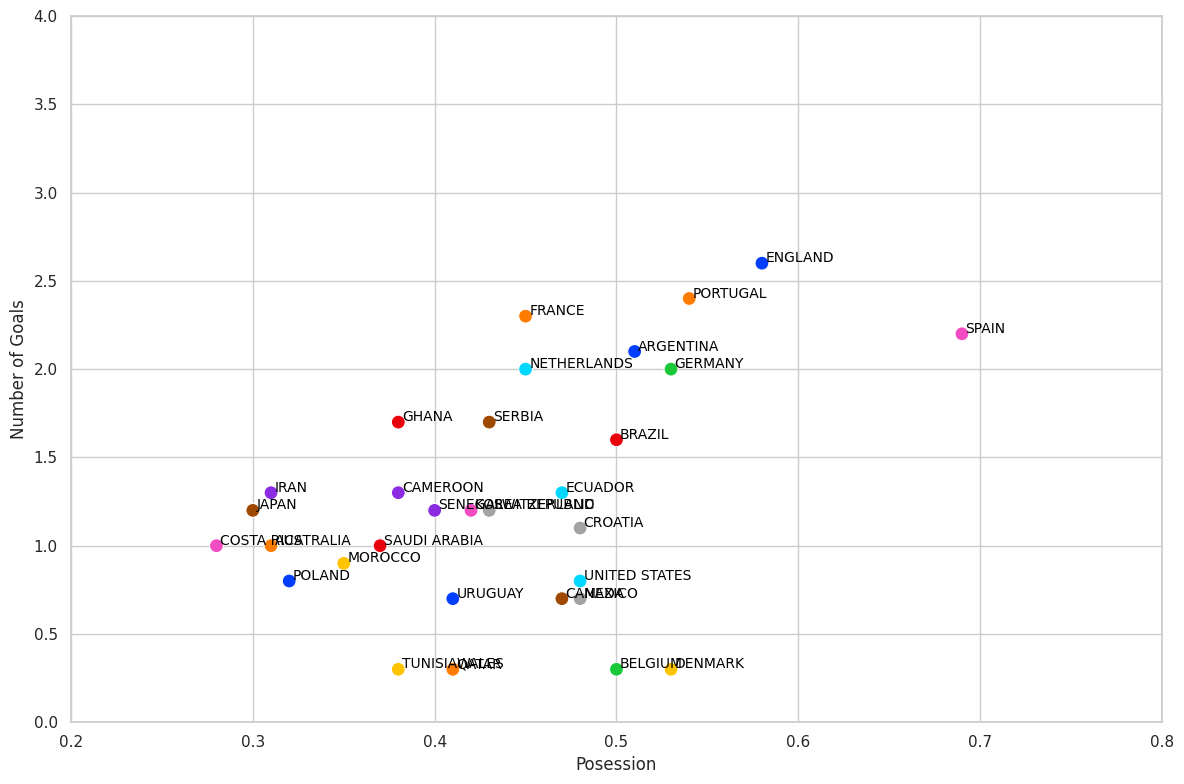

In [ ]:
sns.set(style="whitegrid")


plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=qatar_teams_general['possession'], y=qatar_teams_goals['number of goals avg'], hue=qatar_teams_general['team'], palette='bright',legend=False, s=100)
plt.xlabel('Posession')
plt.ylabel('Number of Goals')

plt.xlim(0.2,0.8)
plt.ylim(0, 4)

for line in range(0, qatar_teams_general.shape[0]):
    plt.text(qatar_teams_general['possession'][line]+0.002, qatar_teams_goals['number of goals avg'][line]+0.005, df['Team'][line], horizontalalignment='left', size='small', color='black', weight='normal')



plt.tight_layout()
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8483ee88-cd2c-4814-9154-7d76d7408f8c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>